In [1]:
from imtools import *
from numpy import *
import pylab as plt

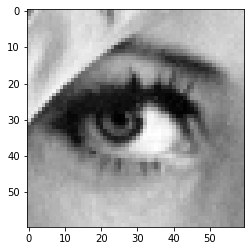

In [3]:
#Exercice n°1.1
i = open_image('lena.png')
display_image(i[235:295,240:300])

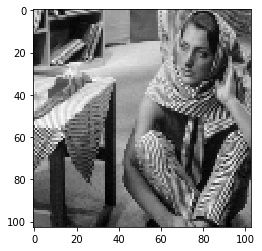

In [4]:
#Exercice n°1.2
i = open_image('barbara.png')
j = i[::5,::5]
display_image(j)

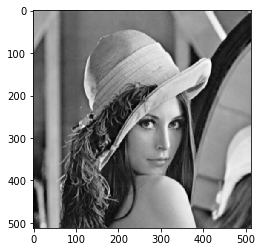

In [6]:
#Exercice n°2.1
def moyenne(i,n):
    M = i.shape[0]
    K = i.shape[1]
    r = i.shape
    w = zeros(r)
    U = zeros(r)
    U[0:2*n+1,0:2*n+1] = 1/((2*n+1)**2)
    for x in range(M):
        for y in range(K):
            for p in range(2*n+1):
                 for q in range(2*n+1):
                    w[x,y] += i[(x-p)%M,(y-q)%K] * U[p,q]
    return w
    
i = open_image('lena.png')
display_image(moyenne(i,1))

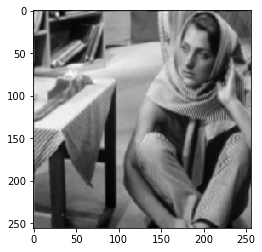

In [10]:
#Exercice n°3.1
def echantillonage2x(i,n):
    k = i[::2,::2]
    j = moyenne(k,n)
    return j

i = open_image('barbara.png')
display_image(echantillonage2x(i,1))

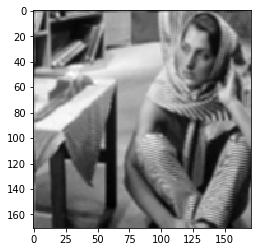

In [10]:
def echantillonage3x(i,n):
    k = i[::3,::3]
    j = moyenne(k,n)
    return j

i = open_image('barbara.png')
display_image(echantillonage3x(i,1))

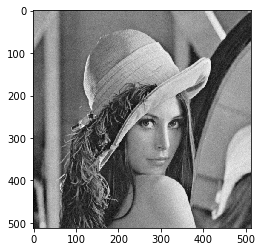

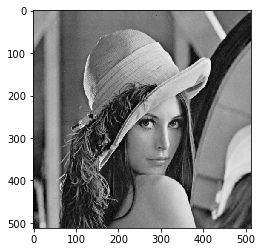

In [10]:
#Exercice n°4.1
i = open_image('lena.png')
def bruitage(i,sigma):
    t = random.normal(0,sigma,i.shape)
    for x in range(i.shape[0]):
        for y in range(i.shape[1]):
            i[x,y] += t[x,y]
    return i

display_image(bruitage(i,5))
i = open_image('lena.png')
display_image(i)

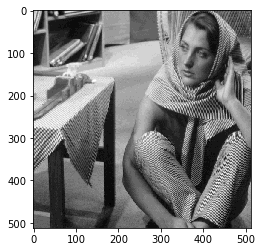

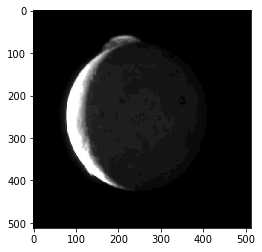

In [14]:
##Exercice n°5
i = open_image('barbara.png')
j = open_image('io.png')
def quantify(i,n):
    k = int(round(255/(n)))
    for x in range(i.shape[0]):
        for y in range(i.shape[1]):
            for j in range(n):
                if k*j <= i[x,y] < k*(j+1):
                    i[x,y] = k*j
    return i
                
display_image(quantify(i,25))
display_image(quantify(j,25))

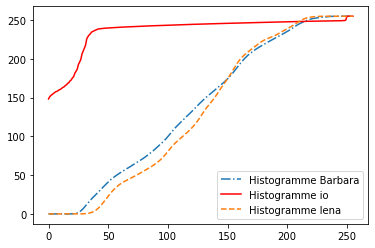

In [3]:
##Exercice n°6.1
i = open_image('barbara.png')
j = open_image('io.png')
h = open_image('lena.png')
def histogramme(i):
    H = zeros(256)
    for x in range(i.shape[0]):
        for y in range(i.shape[1]):
            t = int(i[x,y])
            H[t] += 1
    return H
def histogrammeC(i):
    H1 = zeros(256)
    H = histogramme(i)
    H1[0] = H[0]
    for a in range(1,size(H)):
        H1[a] = H[a] + H1[a-1]
    H1 = H1*(255/H1[size(H1)-1])
    return H1

H1 = histogrammeC(i)
H2 = histogrammeC(j)
H3 = histogrammeC(h)
x = linspace(0,255,256)
plt.plot(x,H1, label = 'Histogramme Barbara', linestyle = '-.')
plt.plot(x,H2, label = 'Histogramme io', color = 'r') 
plt.plot(x,H3, label = 'Histogramme lena', linestyle = '--')
plt.legend()
plt.show()

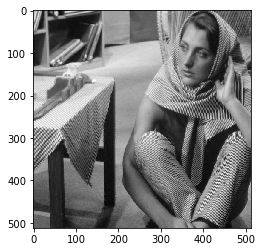

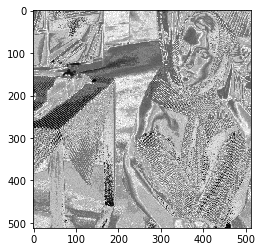

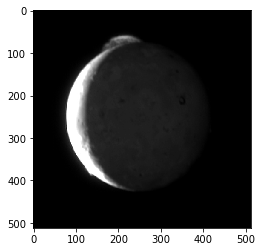

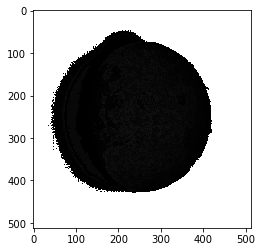

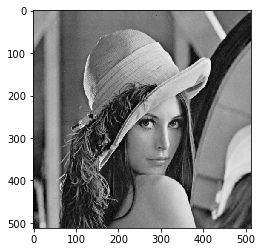

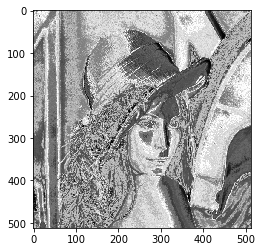

In [4]:
##Exercice n°6.3
def egalise(i):
    H = histogramme(i)
    egalise = zeros(i.shape)
    for x in range(i.shape[0]):
        for y in range(i.shape[1]):
            egalise[x, y] = round(H[int(i[x,y])]*255)
    return egalise

display_image(i)
display_image(egalise(i))
display_image(j)
display_image(egalise(j))
display_image(h)
display_image(egalise(h))

In [57]:
##Exercice n°7.1
i = open_image('barbara.png')
def quantify(i,n):
    m = i.shape[0]*i.shape[1]*(1/n)
    print(m)
    H = zeros(256)
    H1 = zeros(n)
    for x in range(i.shape[0]):
        for y in range(i.shape[1]):
            t = int(i[x,y])
            H[t] += 1
    j = 0
    t = 0
    while j < n and t < 256:
        if H1[j] < m:
            H1[j] += H[t]
        elif j < n:
            j += 1
            H1[j] += H[t]
            print(j)
            print(t)
        else:
            print(H[t] + H1[j])
            print(j)
            print(t)
        t += 1
    return H1

print(quantify(i,20))

13107.2
1
34
2
42
3
50
4
61
5
75
6
87
7
97
8
105
9
113
10
122
11
131
12
141
13
151
14
159
15
166
16
177
17
192
18
207
19
233
[14422. 13337. 13214. 13601. 13567. 13456. 14074. 14583. 13150. 14051.
 14276. 13352. 14005. 15003. 13258. 13413. 13413. 13954. 13206.   809.]
